# Chapter 3 code

This is a shameless copy of Nielsen's JavasScript code in the HTML page at   
http://neuralnetworksanddeeplearning.com/chap3.html  
neuralnetworksanddeeplearning.com/js/saturation1.js  

From Nielsen's code:

    This is a paper.js widget to show a single neuron learning.  In
    particular, the widget is used to show the learning slowdown that
    occurs when the output is saturated.

    The same basic widget is used several times, in slightly different
    configurations.  paper.js makes it somewhat complex to reuse the
    code, so I have simply duplicated the code.  This can give rise to
    bugs if one is not careful to keep the code in sync, so I have
    separated the code into two pieces.

    The first piece is the header code.  This changes between widgets.
    It sets up things like the starting weight, bias, cost function,
    and so on -- things which may vary betweens widgets.

    The second piece is the body code.  This is almost exactly the same
    for the different widgets.  Note, however, that the costGraphX and
    epochX variables change name, due to a bug in the way paperjs
    handles scope.

    We can make these changes by searching on costGraph1 and replacing
    with costGraph2, costGraph3 etc, by replacing epoch1 with epoch2,
    epoch3 etc, and by replcacing cost1 with cost2, cost3 etc.

    This separation makes it easy to maintain the duplicated code.


In [30]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact#, interactive, fixed, interact_manual
from ipywidgets import Layout, Box

import pyradi.ryplot as ryplot
%matplotlib inline


In [31]:
def sigmoid(x):
    return 1. / (1. + np.exp(- x))

In [ ]:
class quadratic_cost:
    
    def __init__(self):
        pass
    
    def fn(self, a):
        return a * a / 2
    
    def derivative(self, a):
        return a*a*(1-a)

class cross_entropy_cost:
    
    def __init__(self):
        pass
    
    def fn(self, a):
        return - np.log(1-a)
    
    def derivative(self, a):
        return 1/(1-a)

def outputValue(weight, bias):
    return sigmoid(weight+bias)


In [ ]:

def plotSimpleNeuron(cost,startingWeight,startingBias,eta, numFrames,iplt=0):
    epochs = np.linspace(0,numFrames,numFrames+1)
    a = np.zeros_like(epochs)
    weight = np.zeros_like(epochs)
    bias = np.zeros_like(epochs)

    p = ryplot.Plotter(iplt,1,1,f'{type(cost).__name__},  w={startingWeight},  b={startingBias}',
                       figsize=(5,3),doWarning=False);

    weight[0] = startingWeight
    bias[0] = startingBias

    for i in range(numFrames):
        a[i] = outputValue(weight[i],bias[i])
        delta = cost.derivative(a[i])
        weight[i+1] = weight[i] - eta * delta
        bias[i+1] = bias[i] - eta * delta

    a[i+1] = outputValue(weight[i+1],bias[i+1]); 

    p.plot(1,epochs,cost.fn(a),'','Epoch','Value',label=['Cost']);    
#     p.plot(1,epochs,weight,label=['Weight']);      
#     p.plot(1,epochs,bias,'','Epoch','Value',label=['Bias']); 
    p.saveFig(f'../book/pic/ch3-{type(cost).__name__}-{int(10*startingWeight)}-{int(10*startingBias)}.pdf')
    iplt += 1
    return iplt


In [ ]:
plotSimpleNeuron(cost=quadratic_cost(),startingWeight=0.6,startingBias=0.9,eta=0.15,numFrames=300);

In [ ]:
plotSimpleNeuron(cost=quadratic_cost(),startingWeight=2,startingBias=2,eta=0.15,numFrames=300);

In [ ]:
plotSimpleNeuron(cost=cross_entropy_cost(),startingWeight=0.6,startingBias=0.9,eta=0.15,numFrames=300);

In [ ]:
plotSimpleNeuron(cost=cross_entropy_cost(),startingWeight=2,startingBias=2,eta=0.15,numFrames=300);

## Softmax


The softmax function is used in neural networks.
Suppose we have a network with four neurons, and four corresponding weighted inputs, which we'll denote $z_{1}^{L}, z_{2}^{L}, z_{3}^{L}$, and $z_{4}^{L}$. 

According to this function, the activation $a^L_j$ of the \mth{j} output neuron is 
\begin{equation}
a_{j}^{L}=\frac{e^{z_{j}^{L}}}{\sum_{k} e^{z_{k}^{L}}}
\label{eq:c03-78} 
\end{equation}
where in the denominator we sum over all the inputs $z^L_j$.

As you increase any one component, its output will increase

Shown below are adjustable sliders showing possible values for the weighted inputs, and a graph of the corresponding output activations. A good place to start exploration is by using the bottom slider to increase $z_{4}^{L}$. 
As you increase $z_{4}^{L}$, you'll see an increase in the corresponding output activation, $a_{4}^{L}$, and a decrease in the other output activations. Similarly, if you decrease $z_{4}^{L}$ then $a_{4}^{L}$ will decrease, and all the other output activations will increase. In fact, if you look closely, you'll see that in both cases the total change in the other activations exactly compensates for the change in $a_{4}^{L}$. The reason is that the output activations are guaranteed to always sum up to 1.

In [57]:
import numpy as np
from ipywidgets import HBox,VBox,Button,FloatSlider,FloatProgress,interactive

# set up the widgets with precalculated values
# these sliders and prog bars are visible and are updated below in the softmax function
sliders = {'1':[2.5,0.31], '2':[-1.,0.009], '3':[3.2,0.633], '4':[0.5,0.043]}
sld = {key:FloatSlider(min=-5.0, max=+5.0, value=f'{sliders[key][0]}', step=0.05,description=f'$z^L_{key}$') for key in sliders}
prb = {key:FloatProgress(value=f'{sliders[key][1]}',min=0,max=1.0,step=0.01,description=f'$a^L_{key}$',bar_style='info',orientation='horizontal') for key in sliders}

# build and display the widget grid in pairs of sliders and prog bars
lstD = [HBox([sld[key], prb[key]]) for key in sld]
display(VBox(lstD))

# function is invoked if any of the sliders change
# and the result is used to change the progress bar
def softmax(**lstZ):
    sum = 0
    for key in lstZ:
        sum += np.exp(lstZ[key])
    for key in lstZ:
        prb[key].value = np.exp(lstZ[key])/sum

#  `interactive` does not display/show the widgets, already done above.
w = interactive(softmax, **sld )

## Draw an Elephant with four parameters

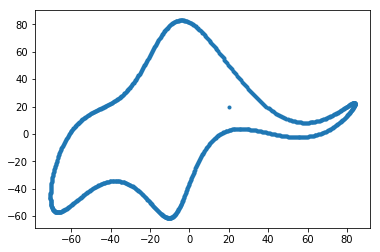

In [2]:
"""
Author: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)

Based on a paper by:
Drawing an elephant with four complex parameters
Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017
"""
import numpy as np
import pylab

# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
pylab.plot(y,-x,'.')
# pylab.show()